# Bike Sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


df = pd.read_csv('/home/wojciech/Pulpit/11/hour.csv')
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [2]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


- natychmiastowy: indeks rekordu
- dteday: data
- season: sezon (1: wiosenny, 2: lato, 3: jesień, 4: zima)
- rok: rok (0: 2011, 1: 2012)
- yr: miesiąc (od 1 do 12)
- hr .: godzina (od 0 do 23)
- holiday: pogoda jest dniem świątecznym lub nie (pobrane z http://dchr.dc.gov/page/holiday-schedule)
- workingday: dzień tygodnia
- weathersit: jeśli dzień nie jest ani weekendem, ani dniem wolnym od pracy wynosi 1, w przeciwnym razie wynosi 0.
+ pogoda:
    - 1: Bezchmurnie, Niewiele chmur, Częściowe zachmurzenie, Częściowe zachmurzenie
    - 2: Mgła + Pochmurno, Mgła + Przerwane chmury, Mgła + Kilka chmur, Mgła
    - 3: lekki śnieg, lekki deszcz + burza z piorunami + rozproszone chmury, lekki deszcz + rozproszone chmury
    - 4: ulewny deszcz + lodowe palety + burza z piorunami + mgła, śnieg + mgła
- temp: Znormalizowana temperatura w stopniach Celsjusza. Wartości są podzielone na 41 (maks.)
- atemp: Znormalizowana temperatura odczuwania w stopniach Celsjusza. Wartości są podzielone na 50 (maks.)
- hum: znormalizowana wilgotność. Wartości są podzielone na 100 (maks.)
- windspeed: znormalizowana prędkość wiatru. Wartości są podzielone na 67 (maks.)
- casual: liczba przypadkowych użytkowników
- registered: liczba zarejestrowanych użytkowników
- cnt: liczba wszystkich wypożyczonych rowerów, w tym zarówno zwykłych, jak i zarejestrowanych

## Wyznaczam zmienną wynikową wstępnie jako cnt

In [3]:
print(df.shape)
df.isnull().sum()

(17379, 17)


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
df.agg(['min', 'max', 'mean', 'median'])

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.0,2011-01-01,1.00000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,17379.0,2012-12-31,4.00000,1.000000,12.000000,23.000000,1.00000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
mean,8690.0,NaN,2.50164,0.502561,6.537775,11.546752,0.02877,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
median,8690.0,NaN,3.00000,1.000000,7.000000,12.000000,0.00000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000


zmienne dyskrtetne to:
    season, yr, holiday,workingday, weekday i inne prawie wszystkie są dyskretne!!
    

#### Szukam zmiennych błędnych! nie widzę!

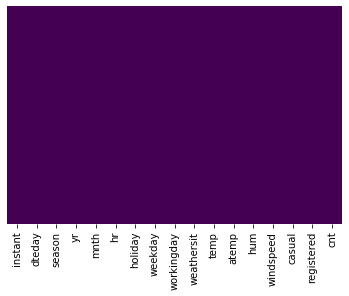

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# wstępna analiza danych
Robie korelację zmiennych 

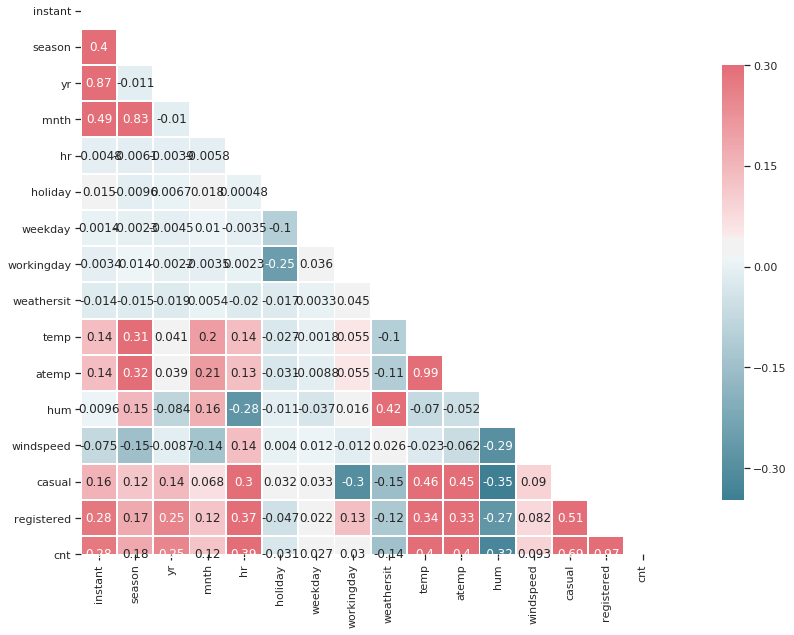

In [6]:
sns.set(style="ticks")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(22, 10))
cmap = sns.diverging_palette(580, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
            square=True, linewidths=.9, cbar_kws={"shrink": 0.8})

Text(0, 0.5, 'Zmienne nezależne ciągłe')

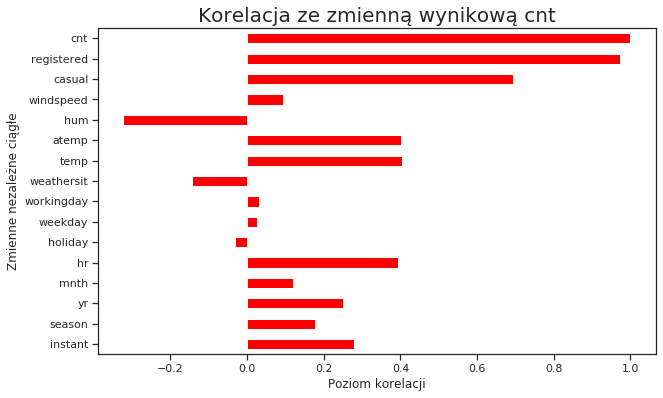

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
corr['cnt'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową cnt', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

# Tworze model regresji liniowej


In [8]:
a,b = df.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df.columns[i]
    h = df[i].nunique()
    f = df[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

object ---nunique-> 731 ---name-> dteday
int64 ---nunique-> 4 ---name-> season
int64 ---nunique-> 2 ---name-> yr
int64 ---nunique-> 12 ---name-> mnth
int64 ---nunique-> 24 ---name-> hr
int64 ---nunique-> 2 ---name-> holiday
int64 ---nunique-> 7 ---name-> weekday
int64 ---nunique-> 2 ---name-> workingday
int64 ---nunique-> 4 ---name-> weathersit
float64 ---nunique-> 50 ---name-> temp
float64 ---nunique-> 65 ---name-> atemp
float64 ---nunique-> 89 ---name-> hum
float64 ---nunique-> 30 ---name-> windspeed
int64 ---nunique-> 322 ---name-> casual
int64 ---nunique-> 776 ---name-> registered
int64 ---nunique-> 869 ---name-> cnt


zmienne:  'registered' i 'cnt' są zbyt mocno ze sobą skorelowane, 'casual' jest również zmienną wynikową mmy więc dwie albo trzy zmienne wynikowe. Teraz decyduje się na zmienną wynikową 'cnt' 

'dteday' jest narazie mienną bezużyteczną. przyda się przy łączeniu z bazą pogodową, 
Dane ciągłe to tylko: 'temp', 'atemp', 'hum', 'windspeed'.

Zrobie model regresji liniowej tylko na danych ciągłych. Zanim to zrobie sprawdzę jaki jest poziom korelacji między tymi zmiennymi ciągłymi.


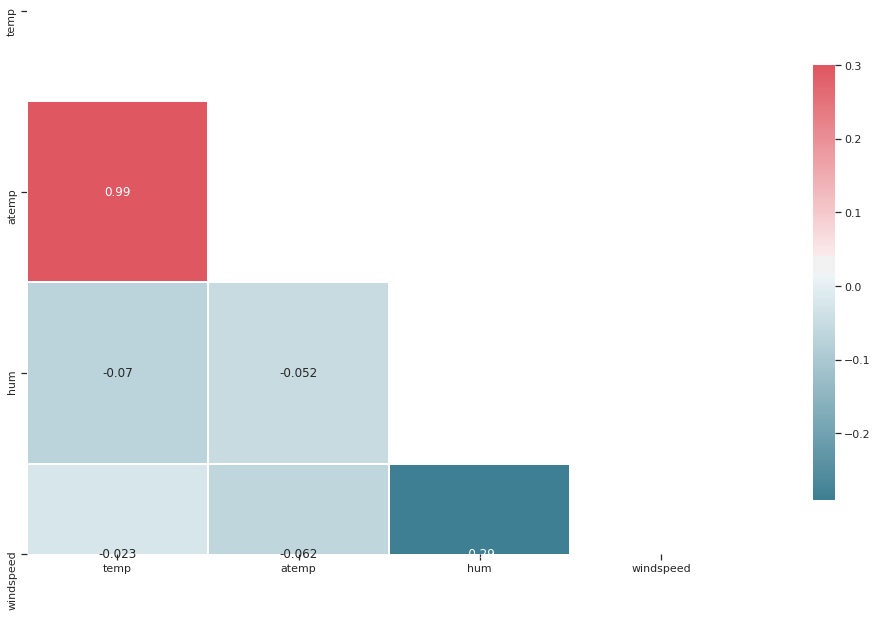

In [9]:
sns.set(style="ticks")

corr = df[['temp', 'atemp', 'hum', 'windspeed']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(22, 10))
cmap = sns.diverging_palette(580, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
            square=True, linewidths=.9, cbar_kws={"shrink": 0.8})

trzeba wyeliminować jedną ze zmiennych: 'temp' lub 'atemp'. Można to zrobić za pomocą metody inflacji wariancji. ja to zrobie za pomocą poziomu korelacji persona ze zmienną wynikową

Stawiam Hipotezę badawczą
-	H0 nie istnieje statystycznie istotna pomiędzy zmianą 'cnt' a temperaturą 
-	H1 istnieje statystycznie istotna korelacja pomiędzy zmianą 'cnt'


### <span style="color:blue">Sprawdzam korelację</span>
Ponieważ mam dane ciągłe sprawdzę korelację za pomocą współczynnika persona.

In [10]:
import scipy

print("\nAssociation between cnt and temperature: ")
PKP = scipy.stats.pearsonr(df['cnt'], df['temp'])
PKP = np.round(PKP, decimals=4)
print(PKP)


Association between cnt and temperature: 
[0.4048 0.    ]


In [11]:
print("\nAssociation between PT08.S4(NO2) and atmospheric pressure: ")
PKP = scipy.stats.pearsonr(df['cnt'], df['atemp'])
PKP = np.round(PKP, decimals=4)
print(PKP)


Association between PT08.S4(NO2) and atmospheric pressure: 
[0.4009 0.    ]


W obu przypadkach wysoka statystyczne korelacja (p<0.01) z 'cnt. Znając prognozę pogody (przyszłą temperaturę i temperaturę odczuwalną) możemy przewidzieć poziom 'cnt'(liczba wszystkich wypożyczonych rowerów, w tym zarówno zwykłych, jak i zarejestrowanych). Obliczam r2 dla prognozowania na podstawie korelacji temperaturą i na podstawie korelacji z temperaturą odczuwalną.

In [12]:
print("Przewidywalność zmienności cnt na podstawie temp: ", 0.4048*0.4048)

Przewidywalność zmienności cnt na podstawie temp:  0.16386304


In [13]:
print("Przewidywalność zmienności cnt na podstawie ciśnienia atemp: ", 0.4009*0.4009)

Przewidywalność zmienności cnt na podstawie ciśnienia atemp:  0.16072081


Być może ludzie podejmują dycyzję o wyporzyczeniu roweru jeszcze w domu kiedy planują dzień, i patrzą na prognozę pogody. temperatura faktyczna jest nieznacznie lepsza w prognozowaniu dlatego eliminuję zmienną ciągłą w postaci temperatury odczuwalenj 'atemp'.

Do wstępnęgo modelu biorę tylko zmienne ciągłe: 
- 'temp', 
- 'hum',
- 'windspeed'

In [14]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
import statsmodels.api as sm

X = df[['temp','hum','windspeed']]
y = df['cnt']

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1945.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:16:47   Log-Likelihood:            -1.1253e+05
No. Observations:               17379   AIC:                         2.251e+05
Df Residuals:                   17375   BIC:                         2.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.8100      6.187     28.416      0.0

/home/wojciech/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Odrazu widać, że R2 jest słaby poziom 0.25 jest fatalny.

In [16]:
df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Dorzucamy zmiennych dyskretnych do modelu: 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit'. 
       
Sprawdzimy ich korelację: wzajemną i związek ze zmienną wynikową

In [17]:
df2 = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'cnt']]

CORREL = df2.corr().sort_values('cnt')
CORREL['cnt'].to_frame().sort_values('cnt')

,cnt
weathersit,-0.142426
holiday,-0.030927
weekday,0.026900
workingday,0.030284
mnth,0.120638
season,0.178056
yr,0.250495
hr,0.394071
cnt,1.000000


Text(0.5, 1, 'Macierz korelacji ze zmienną wynikową y')

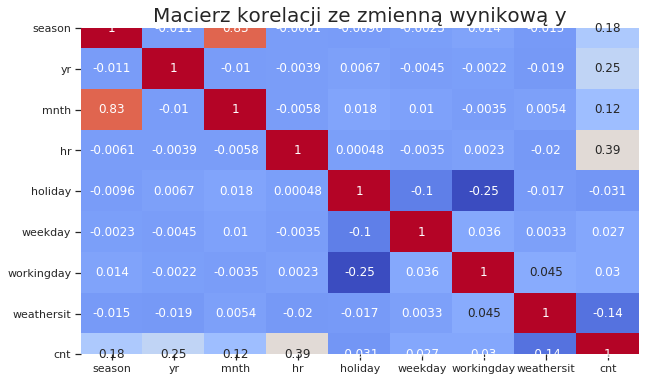

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
CORREL =df2.corr()
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Macierz korelacji ze zmienną wynikową y', fontsize=20)

są ze sobą skorelowane sezon i miesiące co nie dziwi. Zostawiamy narazie wszystkie zmienne dyskretne. dajemy do modelu i sprawdzamy diagnostykę modelu.

In [19]:
df3 = df[['cnt','temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit']]

In [20]:
import statsmodels.api as sm

X = df[['temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit']]
y = df['cnt']

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     999.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:16:48   Log-Likelihood:            -1.1078e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17367   BIC:                         2.217e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.3140      6.814     -2.248      0.0

Wspolczynnik determinacji wzrósł nieznacznie do poziomu 0.38. przydałoby się poszukać shift-ów.
Teraz jednak zrobię ocenę jakości modelu
## Ocena jakości modelu

In [21]:
dfM = pd.concat([X, y], axis=1)

### <span style="color:blue">Residuals vs Fitted plot</span>
Odpowiada na pytanie czy model liniowy dobrze odzwierciedla zmienność procesu.

In [22]:
# model values
model_y = model_fit.fittedvalues

In [23]:
plt.style.use('seaborn')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

Text(0, 0.5, 'Residuals')

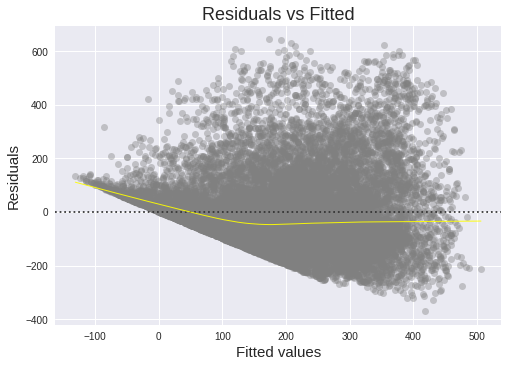

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns

pl_A = plt.figure()
pl_A.axes[0] = sns.residplot(model_y, dfM.columns[-1], data=dfM,
                          lowess=True,
                          scatter_kws={'color': 'grey','alpha': 0.4},
                          line_kws={'color': 'yellow', 'lw': 1, 'alpha': 0.9})

pl_A.axes[0].set_title('Residuals vs Fitted')
pl_A.axes[0].set_xlabel('Fitted values')
pl_A.axes[0].set_ylabel('Residuals')

Jednym z założeń modelu OLS jest umiejętność opisu przebiegu danych przy użyciu linii prostej. Jeśli to założenie jest prawdziwe, powinniśmy mieć stosunkowo płaską linię, patrząc na wartości rezydualne względem dopasowanych punktów (żółta linia). Idealny wykres rozproszenia Residuals vs Fitted, gdy nie ma widocznych wzorów, a żółta linia będzie prosta i pozioma (losowy szum).
Linia w kształcie łuku pokazuje, że model nie uchwycił niektórych elementów nieliniowych. Te nieliniowe cechy nie pasowały do modelu. Być może zmienność danych można lepiej uchwycić przy użyciu modelu wykładniczego lub innej nieliniowej transformacji uzyskanej przy użyciu zmiennych syntetycznych.

#### wniosek model nie opisuje dobrze w pewnym zakresie danych, jest wyraźnie sicięty   


### <span style="color:blue">Normal Q-Q Plot</span>

If the red points are on a straight line, it means that the standarized residuals has a normal distribution.

In [25]:
model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

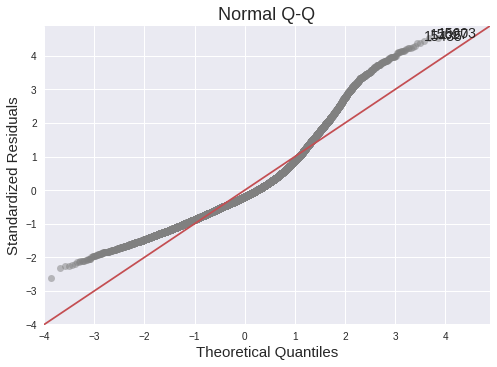

In [26]:
QQ = ProbPlot(model_norm_residuals)
pl_B = QQ.qqplot(line='45', alpha=0.5, color='grey', lw=1)
pl_B.axes[0].set_title('Normal Q-Q')
pl_B.axes[0].set_xlabel('Theoretical Quantiles')
pl_B.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    pl_B.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

Lokalizacja punktów wskazuje, że standaryzowane wartości rezydualne modelu (standaryzowane reszty modelu) nie mają doskonałego rozkładu normalnego. Jeśli punkty nie znajdują się na czerwonej linii - jest daleko od czerwonej linii - oznacza to, że standaryzowane reszty nie są normalnie rozmieszczone (model ma „ciężkie ogony”).
Jeśli standaryzowane reszty nie mają rozkładu normalnego, model może generować ekstremalne wyniki.

#### Sprawdźmy, które dane obciążają rozkład normalny

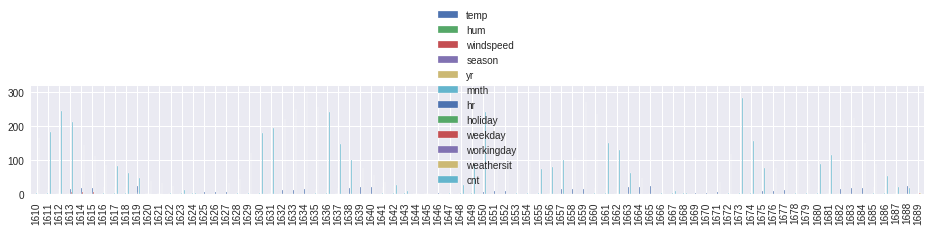

In [27]:
dfM.iloc[1610:1690, :].plot(kind='bar',figsize=(16,2))

Wyraźnie widać, obserwacja 1646, którą wskazał wykres Normal Q-Q Plot, istotnie odstaje od pozostałych danych. Chcąc poprawić jakość modelu regresji należy wyrzucić z danych wartości odstające.

### <span style="color:blue">Scale-Location plot</span>

Wykres sprawdza niespójność wariancji lub heteroscedastyczności. Zgodnie z zasadą homoscedastyczności, każdy rozkład prawdopodobieństwa dla y (zmienna wynikowa) ma to samo odchylenie standardowe, niezależnie od wartości x (predyktor).

In [28]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)

Im bardziej pozioma jest żółta linia, tym bardziej prawdopodobne jest, że dane są homoscedastyczne.
Wykres heteroscedastyczny może mieć kształt litery „V”, co oznacza, że w porównaniu do środkowej części są wyższe wartości po lewej i po prawej stronie wykresu. Może to wynikać z nieujawnienia nieliniowości w modelu i należy to dalej zbadać. Dwie najczęstsze metody „konsolidacji” heteroscedastyczności to:

- użycie metody ważenia metodą najmniejszych kwadratów lub
- użycie heteroscedastycznie skorygowanej macierzy kowariancji (hccm).

Kolejny wykres wskazał obserwacje numer 1646 jako wycinek zaburzający model regresji liniowej.


### <span style="color:blue">Residuals vs Leverage plot</span>

Gdy standaryzowane reszty nie mają rozkładu normalnego, mogą wystąpić ekstremalne wartości wyników y. W przypadku wysokich punktów dźwigni mogą pojawić się skrajnie niezależne zmienne x. Ekstremalne x wydaje się być takie złe, ale może mieć szkodliwy wpływ na model, ponieważ współczynniki przy x lub β są bardzo wrażliwe na punkty dźwigni. Celem wykresu Residuals vs Leverage jest identyfikacja tych problematycznych obserwacji.

In [29]:
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]

Dzięki odległości Cooka musimy tylko znaleźć punkty dźwigni, które mają odległość większą niż 0,5. Te 0,5 są pokazane na wykresie w postaci przerywanej krzywej na górze i na dole - pokazane, gdy wystąpią takie wartości odstające. Na tym wykresie nie mamy żadnych punktów dźwigni, które byłyby poza krzywą 0,5. Dlatego nie ma wartości odstających w prawym górnym lub prawym dolnym polu wykresu.
Postępowanie z wykresem Residuals vs Leverage polega na tym, że wartości odstające są usuwane ze zmiennych niezależnych, a model jest ponownie budowany. Taka procedura poprawia właściwości modelu.

Wykres wskazał na obserwację numer 11187. Zobaczmy co to za dane.

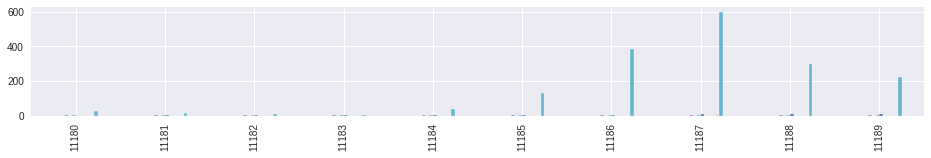

In [30]:
dfM.iloc[11180:11190, :].plot(kind='bar',figsize=(16,2), legend=False)

In [31]:
dfM.iloc[11187:11188, :]

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
11187,0.56,0.83,0.1642,2,1,4,8,1,1,0,2,597


In [32]:
dfM.iloc[8392:8395, :]

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
8392,0.36,0.93,0.0000,1,0,12,8,0,3,1,3,405
8393,0.40,0.87,0.2239,1,0,12,9,0,3,1,2,234
8394,0.48,0.82,0.4179,1,0,12,10,0,3,1,2,89


In [33]:
dfM.iloc[16160:16164, :]

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
16160,0.32,0.87,0.1045,4,1,11,2,0,0,0,1,70
16161,0.34,0.81,0.0000,4,1,11,3,0,0,0,1,48
16162,0.32,0.81,0.1045,4,1,11,4,0,0,0,1,11
16163,0.30,0.87,0.1343,4,1,11,5,0,0,0,1,12


### <span style="color:blue">Influence plot</span>

Wykres wpływu pokazuje wartości rezydualne modelu w funkcji dźwigni każdej obserwacji zmierzonej za pomocą macierzy hat matrix. Zewnętrznie wyuczone wartości rezydualne są skalowane zgodnie z ich standardowym odchyleniem
Dostępne są dwie miary wpływu: Cook i DFFITS.

In [34]:
dfM.iloc[8513:8518, :]

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
8513,0.34,0.46,0.5821,1,0,12,11,1,1,0,1,91
8514,0.36,0.43,0.4627,1,0,12,12,1,1,0,1,100
8515,0.38,0.40,0.2985,1,0,12,13,1,1,0,1,140
8516,0.38,0.40,0.3284,1,0,12,14,1,1,0,1,153
8517,0.38,0.40,0.2537,1,0,12,15,1,1,0,1,131


In [35]:
dfM.iloc[12978:12981, :]

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
12978,0.82,0.63,0.1940,3,1,6,23,0,5,1,3,48
12979,0.64,0.89,0.1642,3,1,6,0,0,6,0,3,69
12980,0.64,0.89,0.2239,3,1,6,1,0,6,0,3,58



Interpretacja

Wielkość baniek (na naszym wykresie słabo to widać) oznacza wielkość odległości cooka, czym większa bańka tym większy parametr cooka.

#### DFFITS
DFFITS to diagnostyka, która ma pokazać, jak duży wpływ ma punkt w regresji statystycznej zaproponowanej w 1980 r. [1] Jest on zdefiniowany jako studencki DFFIT, gdzie ten ostatni jest zmianą przewidywanej wartości dla punktu, uzyskaną, gdy ten punkt jest pozostawiony poza regresją.

#### Cooks
jest powszechnie stosowanym oszacowanie wpływu punktu danych podczas wykonywania regresji najmniejszych kwadratów. [1] W praktycznej zwykłej analizie metodą najmniejszych kwadratów odległość Cooka można wykorzystać na kilka sposobów: 
- w celu wskazania wpływowych punktów danych, które są szczególnie warte sprawdzenia pod kątem ważności; lub 
- wskazać obszary przestrzeni projektowej, w których dobrze byłoby uzyskać więcej punktów danych. 

Oznacza to, że odległość Cooks mierzy wpływ każdej obserwacji w modelu lub „co by się stało, gdyby każdej obserwacji nie było w modelu”, i jest to ważne, ponieważ jest to jeden ze sposobów wykrywania wartości odstających, który wpływa szczególnie na linię regresji. Gdy nie szukamy i nie traktujemy potencjalnych wartości odstających w naszych danych, możliwe, że skorygowane współczynniki dla modelu mogą nie być najbardziej reprezentatywne lub odpowiednie, co może prowadzić do nieprawidłowego wnioskowania.

#### The hat values
Wartości hat są wartościami dopasowanymi lub przewidywaniami dokonanymi przez model dla każdej obserwacji. Zupełnie różni się od odległości Cooka.

#### H levarage
H levarage mierzy, jak każdy parametr wejściowy X wpływa na model dopasowania. Natomiast odległość Cooka obejmuje również wpływ parametru wyjściowego y.

# CZ.2 Ekliminacja zmiennych

# Elininacja zmiennych niezależnych – Variance Inflation Factor (VIF)

In [36]:
import pandas as pd
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [37]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [38]:
df.columns
exogs =['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']

In [39]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [40]:
print('Jeżeli VIF wynosi więcej niż 5 prawdopodobnie występuje multicollinearity' )

pks = sklearn_vif(exogs, df)
pks.sort_values('VIF').round(1)
print()
print('LinearRegression in sklearn')
print(pks[pks['VIF']<=10])


kot = get_vif(exogs, df)
kot.sort_values('VIF').round(1)
print()
print('LinearRegression in statasmodels')
print(kot[kot['VIF']<=10])


Jeżeli VIF wynosi więcej niż 5 prawdopodobnie występuje multicollinearity

LinearRegression in sklearn
                 VIF  Tolerance
season      3.527410   0.283494
yr          1.094830   0.913384
mnth        3.285116   0.304403
hr          1.262889   0.791835
holiday     1.084497   0.922087
weekday     1.017867   0.982446
workingday  1.404402   0.712047
weathersit  1.283971   0.778834
hum         1.666538   0.600046
windspeed   1.199882   0.833415
casual      2.181243   0.458454
registered  1.786158   0.559861

LinearRegression in statasmodels
                 VIF  Tolerance
season      3.527410   0.283494
yr          1.094830   0.913384
mnth        3.285116   0.304403
hr          1.262889   0.791835
holiday     1.084497   0.922087
weekday     1.017867   0.982446
workingday  1.404402   0.712047
weathersit  1.283971   0.778834
hum         1.666538   0.600046
windspeed   1.199882   0.833415
casual      2.181243   0.458454
registered  1.786158   0.559861


Brak jest multicollinarity

# Elininacja nowych zmiennych niezależnych - Step Forward Selection

Selekcja w przód to metoda iteracyjna, w której zaczynamy od braku funkcji w modelu. W każdej iteracji dodajemy funkcję, która najlepiej ulepsza nasz model, dopóki dodanie nowej zmiennej nie poprawi wydajności modelu.

In [41]:
X = df.drop('cnt', axis=1) 
y = df['cnt']  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

In [42]:
k_features = 16

In [43]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

LR = LinearRegression()

sfs1 = sfs(LR,k_features = k_features, forward=True, floating=False, scoring='r2',verbose=2,cv=5)
sfs1 = sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    estimat

In [44]:
feat_cols =list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [45]:
X.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],
      dtype='object')

In [46]:
new_cols = df.columns[feat_cols]
new_cols

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],
      dtype='object')

#### Tworzę zbiór danych ze zredukowanymi kolumnami

In [47]:
df2 = df[new_cols]
df2.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27


Kolejny raz okazało się że zmiennych niezależnych nie trzeba redukować, są słabe ale nie powinny być redukowane dla dobra jakości modelu. 

## WNIOSEK OSTATECZNY - PO ELIMINACJI ZMIENNEJ dtemp NIE MAJUZ POTRZEBY ELIMINACJI ZMIENNYCH

In [48]:
X = df[['temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit']]
y = df['cnt']

In [49]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
print('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.387748
The reduction of dimensions caused the deterioration of the models properties


/home/wojciech/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Wciąż mamy niski poziom r2  

# Pearson correlation

In [50]:
def matrix_plot(df,title):

    sns.set(style="ticks")

    corr = df.corr()
    corr = np.round(corr, decimals=2)


    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(20, 20))
    #cmap = sns.diverging_palette(580, 10, as_cmap=True)
    cmap = sns.diverging_palette(180, 90, as_cmap=True) #Inna paleta barw

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
                square=True, linewidths=.9, cbar_kws={"shrink": 0.8})
    plt.xticks(rotation=90)
    plt.title(title,fontsize=32,color='#0c343d',alpha=0.5)
    plt.show

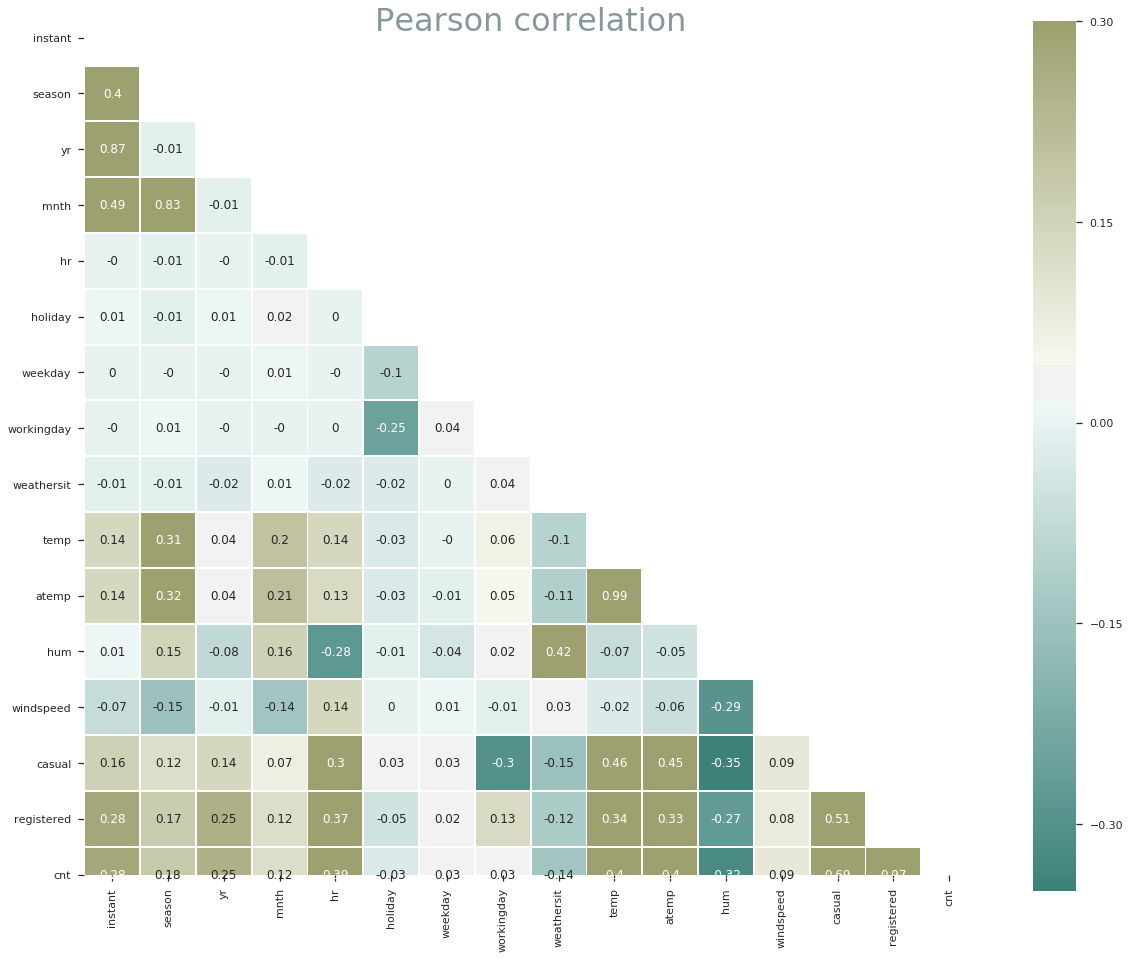

In [51]:
matrix_plot(df,'Pearson correlation')

### Correlation to the result variable

Text(0, 0.5, 'Continuous independent variables')

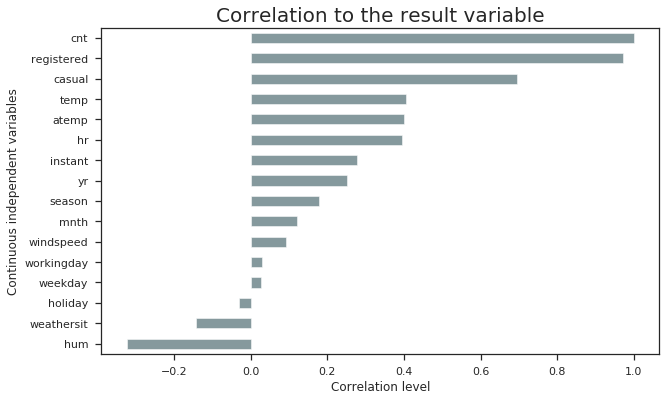

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
CORREL = df.corr().sort_values('cnt')
CORREL['cnt'].plot(kind='barh',color='#0c343d',alpha=0.5)
plt.title('Correlation to the result variable', fontsize=20)
plt.xlabel('Correlation level')
plt.ylabel('Continuous independent variables')

### I find variables that are highly correlated with the result variable

In [53]:
kot = abs(CORREL['cnt'])
FAT = kot[kot>=0.7]
FAT

registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

### Compares variables in pairs

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text xticklabel objects>)

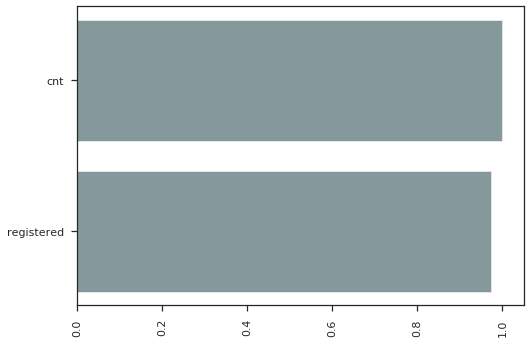

In [54]:
plt.barh(*zip(*FAT.items()),color='#0c343d',alpha=0.5) 
plt.xticks(rotation=90)

### High autocorrelation chart

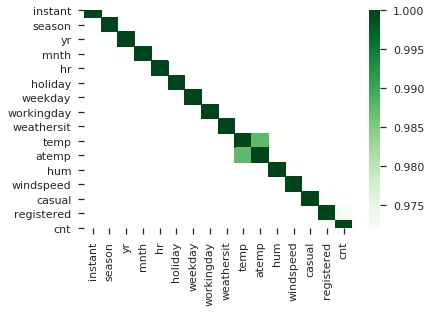

In [55]:
CORR = df.corr()

kot = CORR[CORR>=.9]
plt.figure(figsize=(6,4))
sns.heatmap(kot, cmap="Greens")

## WNIOSEK OSTATECZNY - PO ELIMINACJI ZMIENNEJ dtemp NIE MAJUZ POTRZEBY ELIMINACJI ZMIENNYCH

In [56]:
X = df[['temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit']]
y = df['cnt']

In [57]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
print('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.387748
The reduction of dimensions caused the deterioration of the models properties


/home/wojciech/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# cz. 3


Będziemy teraz kontynuować przygotowywanie danych do dalszej analizy. Jedną z najważniejszych zmiennych opisujących regresję liniową jest czas. Większość zjawisk sztucznych i naturalnych przebiega w cyklach godzinowych, dobowych i miesięcznych.

# Graficzna analiza wyporzyczania rowerów 'cnt' według zmiennych czasowych


- natychmiastowy: indeks rekordu
- dteday: data
- season: sezon (1: wiosenny, 2: lato, 3: jesień, 4: zima)
- rok: rok (0: 2011, 1: 2012)
- yr: miesiąc (od 1 do 12)
- hr .: godzina (od 0 do 23)
- holiday: pogoda jest dniem świątecznym lub nie (pobrane z http://dchr.dc.gov/page/holiday-schedule)
- workingday: dzień tygodnia
- weathersit: jeśli dzień nie jest ani weekendem, ani dniem wolnym od pracy wynosi 1, w przeciwnym razie wynosi 0.
+ pogoda:
    - 1: Bezchmurnie, Niewiele chmur, Częściowe zachmurzenie, Częściowe zachmurzenie
    - 2: Mgła + Pochmurno, Mgła + Przerwane chmury, Mgła + Kilka chmur, Mgła
    - 3: lekki śnieg, lekki deszcz + burza z piorunami + rozproszone chmury, lekki deszcz + rozproszone chmury
    - 4: ulewny deszcz + lodowe palety + burza z piorunami + mgła, śnieg + mgła
- temp: Znormalizowana temperatura w stopniach Celsjusza. Wartości są podzielone na 41 (maks.)
- atemp: Znormalizowana temperatura odczuwania w stopniach Celsjusza. Wartości są podzielone na 50 (maks.)
- hum: znormalizowana wilgotność. Wartości są podzielone na 100 (maks.)
- windspeed: znormalizowana prędkość wiatru. Wartości są podzielone na 67 (maks.)
- casual: liczba przypadkowych użytkowników
- registered: liczba zarejestrowanych użytkowników
- cnt: liczba wszystkich wypożyczonych rowerów, w tym zarówno zwykłych, jak i zarejestrowanych

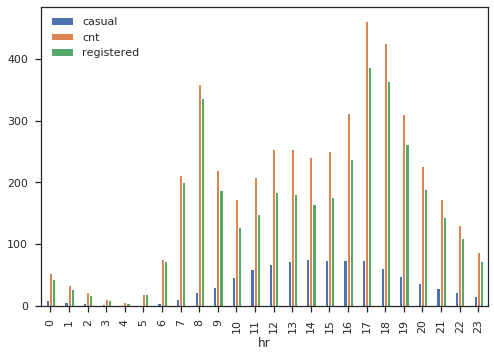

In [58]:
df.pivot_table(index='hr', values=['cnt','registered','casual'], aggfunc='mean').plot(kind='bar')

Godziny wyporzyczania rowerów nie dziwią, w nocy mało kto wypożycza rowery.

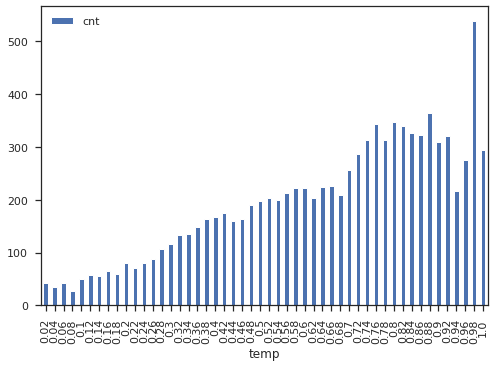

In [59]:
df.pivot_table(index='temp', values='cnt', aggfunc='mean').plot(kind='bar')

Wskaźnik temperatury posiada nienaturalną skalę od 0.02 do 1. Należy sprawdzić rozkład temperatur ponieważ wypożyczanie rowerów przy temperaturze 0.98 jest zastanawiające.

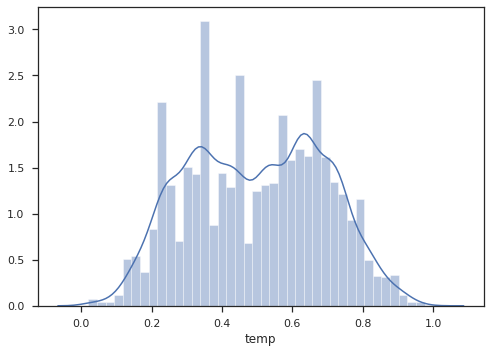

In [60]:
sns.distplot(df.temp)

((array([-3.94509974, -3.7271979 , -3.60788822, ...,  3.60788822,
          3.7271979 ,  3.94509974]),
  array([0.02, 0.02, 0.02, ..., 0.96, 0.98, 1.  ])),
 (0.1905189508705201, 0.4969871684216585, 0.9892341615660681))

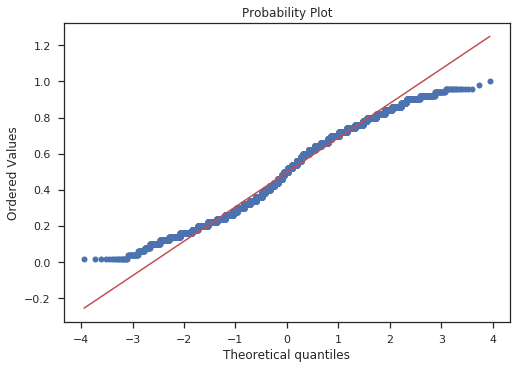

In [61]:
import pylab
import scipy.stats as scipystats

scipystats.probplot(df['temp'], dist="norm", plot=pylab)

Zmienna: temperatura ma rozkład zbliżony do rozkładu normalnego.
Z powyższego wynika że powinniśmy usunąć ze zbuioru danych temp = 0.98
narazie tego nie robimy

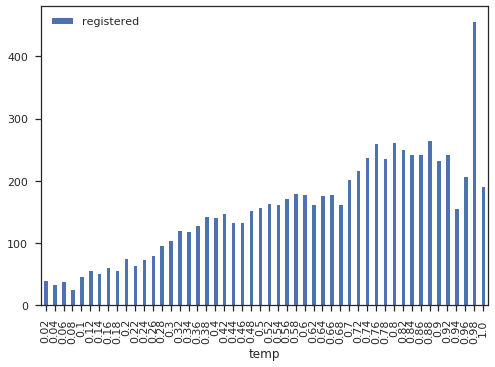

In [62]:
df.pivot_table(index='temp', values=['registered'], aggfunc='mean').plot(kind='bar')

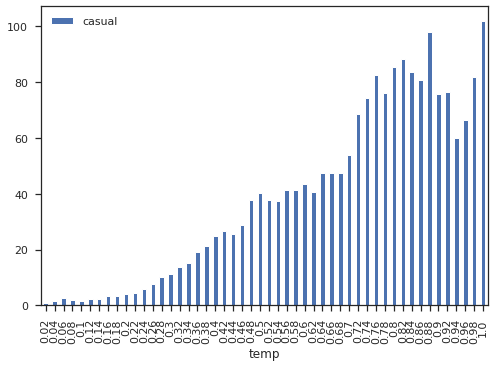

In [63]:
df.pivot_table(index='temp', values=['casual'], aggfunc='mean').plot(kind='bar')

# Cz.4    We are now checking shift

Zmienna RH - Wilgotność względna (%)
Sprawdzamy zmienną o bardzo niskiej korelacji z wynikową zmienną 'cnt'

In [64]:
CORREL = df.corr().sort_values('cnt')
CORREL['cnt'].to_frame().sort_values('cnt')

,cnt
hum,-0.322911
weathersit,-0.142426
holiday,-0.030927
weekday,0.026900
workingday,0.030284
windspeed,0.093234
mnth,0.120638
season,0.178056
yr,0.250495
instant,0.278379


In [65]:
def cross_corr(x, y, lag=0):
    return x.corr(y.shift(lag))

def shift_Factor(x,y,R):
    x_corr = [cross_corr(x, y, lag=i) for i in range(R)]
    
    # R factor is the number of the shifts who should be checked by the function
    Kot = pd.DataFrame(list(x_corr)).reset_index()
    Kot.rename(columns={0:'Corr', 'index':'Shift_num'}, inplace=True)
    
    # We find optimal correlation shift
    Kot['abs'] = Kot['Corr'].abs()
    SF = Kot.loc[Kot['abs']==Kot['abs'].max(), 'Shift_num']
    p1 = SF.to_frame()
    SF = p1.Shift_num.max()
    
    return SF

In [66]:
x = df.temp       # independent variable
y = df['cnt']    # dependent variable
R = 20           # number of shifts who will be checked

In [67]:
SKO = shift_Factor(x,y,R)
print('Optimal shift for RH: ',SKO)
print()
b = cross_corr(x, y, lag=SKO)
a = cross_corr(df['temp'], df['cnt'], lag=SKO)
print('Przed shift:', a)
print('Po shift:   ', b)

Optimal shift for RH:  1

Przed shift: 0.40603660279057013
Po shift:    0.40603660279057013


In [68]:
x = df.weathersit       # independent variable
y = df['cnt']    # dependent variable
R = 20           # number of shifts who will be checked

In [69]:
SKO = shift_Factor(x,y,R)
print('Optimal shift for RH: ',SKO)
print()
b = cross_corr(x, y, lag=SKO)
a = cross_corr(df['weathersit'], df['cnt'], lag=SKO)
print('Przed shift:', a)
print('Po shift:   ', b)

Optimal shift for RH:  0

Przed shift: -0.14242613813809782
Po shift:    -0.14242613813809782


In [70]:
x = df.hum       # independent variable
y = df['cnt']    # dependent variable
R = 20           # number of shifts who will be checked

In [71]:
SKO = shift_Factor(x,y,R)
print('Optimal shift for RH: ',SKO)
print()
b = cross_corr(x, y, lag=SKO)
a = cross_corr(df['hum'], df['cnt'], lag=SKO)
print('Przed shift:', a)
print('Po shift:   ', b)

Optimal shift for RH:  1

Przed shift: -0.32359938218403894
Po shift:    -0.32359938218403894


In [72]:
x = df.windspeed      # independent variable
y = df['cnt']    # dependent variable
R = 20           # number of shifts who will be checked

In [73]:
SKO = shift_Factor(x,y,R)
print('Optimal shift for RH: ',SKO)
print()
b = cross_corr(x, y, lag=SKO)
a = cross_corr(df['windspeed'], df['cnt'], lag=SKO)
print('Przed shift:', a)
print('Po shift:   ', b)

Optimal shift for RH:  13

Przed shift: -0.1977722099900889
Po shift:    -0.1977722099900889


ISTNIEJE ISTOTNY SHIFT PRZY ZMIENNEJ "windspeed" 

"windspeed" to ostatnia zmienna, którą mogę przebadać pod kontem shift. Teraz muszę dostoswać bazę do shift. 
Okazuje się, że "windspeed" korelują dopiero po 1 godzinie od zmiany "windspeed".
Funkcja tworzenia przesunięcia danych.

In [74]:
def df_shif(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for h in df.columns:
        if h == target:
            new[h] = df[target]
        else:
            new[h] = df[h].shift(periods=lag)
    return  pd.DataFrame(data=new)

Dodaje datę i godzinę rejestracji "windspeed".

In [75]:
df2 = df[['temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']]

Robie dubla zmiennej: df2['hr']

In [76]:
df2['windspeed_shift'] = df2['windspeed']

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df3 = df_shif(df2, 'windspeed_shift', lag=13)
df3.head(7)

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,windspeed_shift
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0896
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000


Usuwam przesunięte rekordy

In [78]:
df3 = df3.dropna(how ='any')
df3.head(7)

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,windspeed_shift
13,0.24,0.81,0.0000,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,16.0,0.2985
14,0.22,0.80,0.0000,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,40.0,0.2836
15,0.22,0.80,0.0000,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,32.0,0.2985
16,0.24,0.75,0.0000,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,13.0,0.2985
17,0.24,0.75,0.0000,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,1.0,0.2836
18,0.24,0.75,0.0896,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,1.0,0.2537
19,0.22,0.80,0.0000,1.0,0.0,1.0,6.0,0.0,6.0,0.0,1.0,2.0,0.2537


In [79]:
CORREL = df3.corr().sort_values('cnt')
CORREL['cnt'].to_frame().sort_values('cnt')

,cnt
hum,-0.322957
windspeed_shift,-0.197772
weathersit,-0.142542
holiday,-0.030952
weekday,0.026782
workingday,0.030381
windspeed,0.093186
mnth,0.120968
season,0.178016
yr,0.250736


Dzięki Shift uzyskaliśmy mocną zmienną niezależną czyli 13 godzine przesunięcie "windspeed"

Sprawdzam o ile poprawił się model OLS

## wNIOSEK NIE ZNALAZŁEM ISTOTNYCH SCHIFTÓW W SZEREGACH CZASOWYCH

In [80]:
X = df3[['temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit','windspeed_shift']]
y = df3['cnt']

In [81]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
print('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.397138
The reduction of dimensions caused the deterioration of the models properties


Poprawa r2 z poziomu 0.387748 do poziomu 0.397138. to około 1%.

# Cz.4  Eksperymentuje ze zmiennymi syntetycznymi

In [82]:
df3

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,windspeed_shift
13,0.24,0.81,0.0000,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,16.0,0.2985
14,0.22,0.80,0.0000,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,40.0,0.2836
15,0.22,0.80,0.0000,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,32.0,0.2985
16,0.24,0.75,0.0000,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,13.0,0.2985
17,0.24,0.75,0.0000,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,1.0,0.2836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.16,0.64,0.1642,1.0,1.0,12.0,6.0,0.0,1.0,1.0,1.0,40.0,0.1642
17375,0.16,0.64,0.1343,1.0,1.0,12.0,7.0,0.0,1.0,1.0,1.0,85.0,0.1642
17376,0.14,0.69,0.1343,1.0,1.0,12.0,8.0,0.0,1.0,1.0,1.0,196.0,0.1642
17377,0.18,0.64,0.1045,1.0,1.0,12.0,9.0,0.0,1.0,1.0,2.0,157.0,0.1343


In [83]:
df3['nowa1'] = df3['temp']*df3['hum']

In [84]:
X = df3[['temp','hum','windspeed','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit','windspeed_shift','nowa1']]
y = df3['cnt']

In [85]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
print('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.405859
The reduction of dimensions caused the deterioration of the models properties


# Robie wspołczynnik rozstępowy

In [86]:

df3['temp_diff_2'] = df3['temp'].diff(periods = 2)
df3['temp_diff_3'] = df3['temp'].diff(periods = 3)
df3['temp_diff_4'] = df3['temp'].diff(periods = 4)
df3['temp_diff_5'] = df3['temp'].diff(periods = 5)
df3['temp_diff_6'] = df3['temp'].diff(periods = 6)
df3['temp_diff_7'] = df3['temp'].diff(periods = 7)
df3['temp_diff_8'] = df3['temp'].diff(periods = 8)
df3['temp_diff_9'] = df3['temp'].diff(periods = 9)
df3['temp_diff_10'] = df3['temp'].diff(periods = 10)
df3['temp_diff_11'] = df3['temp'].diff(periods = 11)
df3['temp_diff_12'] = df3['temp'].diff(periods = 12)

#df3['windspeed_diff_1'] = df3['windspeed'].diff(periods = 1)
#df3['windspeed_diff_2'] = df3['windspeed'].diff(periods = 2)
#df3['windspeed_diff_3'] = df3['windspeed'].diff(periods = 3)

df3['hum_diff_1'] = df3['hum'].diff(periods = 1)
df3['hum_diff_2'] = df3['hum'].diff(periods = 2)
df3['hum_diff_4'] = df3['hum'].diff(periods = 4)
df3['hum_diff_5'] = df3['hum'].diff(periods = 5)
df3['hum_diff_6'] = df3['hum'].diff(periods = 6)
df3['hum_diff_7'] = df3['hum'].diff(periods = 7)
df3['temp_diff_8'] = df3['temp'].diff(periods = 8)
df3['temp_diff_9'] = df3['temp'].diff(periods = 9)
df3['temp_diff_10'] = df3['temp'].diff(periods = 10)
df3['temp_diff_11'] = df3['temp'].diff(periods = 11)
df3['temp_diff_12'] = df3['temp'].diff(periods = 12)

#df3['weathersit_diff_1'] = df3['weathersit'].diff(periods = 1)
#df3['weathersit_diff_2'] = df3['weathersit'].diff(periods = 2)
#df3['weathersit_diff_3'] = df3['weathersit'].diff(periods = 3)


In [91]:
X = df3.drop('cnt', axis=1) 
y = df3['cnt']  

In [92]:
df3 = df3.dropna(how ='any')
df3.head(7)

,temp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,workingday,...,temp_diff_9,temp_diff_10,temp_diff_11,temp_diff_12,hum_diff_1,hum_diff_2,hum_diff_4,hum_diff_5,hum_diff_6,hum_diff_7
25,0.42,0.77,0.2836,1.0,0.0,1.0,12.0,0.0,6.0,0.0,...,0.18,0.20,0.20,0.18,-0.04,0.01,0.02,-0.09,-0.03,0.02
26,0.46,0.72,0.2985,1.0,0.0,1.0,13.0,0.0,6.0,0.0,...,0.22,0.22,0.24,0.24,-0.05,-0.09,-0.04,-0.03,-0.14,-0.08
27,0.46,0.72,0.2836,1.0,0.0,1.0,14.0,0.0,6.0,0.0,...,0.22,0.22,0.22,0.24,0.00,-0.05,-0.04,-0.04,-0.03,-0.14
28,0.44,0.77,0.2985,1.0,0.0,1.0,15.0,0.0,6.0,0.0,...,0.22,0.20,0.20,0.20,0.05,0.05,-0.04,0.01,0.01,0.02
29,0.42,0.82,0.2985,1.0,0.0,1.0,16.0,0.0,6.0,0.0,...,0.22,0.20,0.18,0.18,0.05,0.10,0.05,0.01,0.06,0.06
30,0.44,0.82,0.2836,1.0,0.0,1.0,17.0,0.0,6.0,0.0,...,0.20,0.24,0.22,0.20,0.00,0.05,0.10,0.05,0.01,0.06
31,0.42,0.88,0.2537,1.0,0.0,1.0,18.0,0.0,6.0,0.0,...,0.10,0.18,0.22,0.20,0.06,0.06,0.16,0.16,0.11,0.07


In [93]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
print('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.477604
The reduction of dimensions caused the deterioration of the models properties


# Redukuje zmienne o małej korelacji persona

In [94]:
CORREL = df3.corr().sort_values('cnt')
CORREL['cnt'].to_frame().sort_values('cnt')

,cnt
hum_diff_7,-0.380692
hum_diff_6,-0.328586
hum,-0.322609
hum_diff_5,-0.275355
hum_diff_4,-0.220815
windspeed_shift,-0.197452
weathersit,-0.142949
hum_diff_2,-0.115062
hum_diff_1,-0.058653
holiday,-0.031075


# Step Forward Selection

In [96]:
X = df3.drop('cnt', axis=1) 
y = df3['cnt']  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

In [97]:
k_features = 16

In [98]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

LR = LinearRegression()

sfs1 = sfs(LR,k_features = k_features, forward=True, floating=False, scoring='r2',verbose=2,cv=5)
sfs1 = sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished

[2020-08-13 14:44:56] Features: 1/16 -- score: 0.2961033723319155[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2020-08-13 14:44:57] Features: 2/16 -- score: 0.36014585193266446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2020-08-13 14:44:57] Features: 3/16 -- score: 0.41753960059879003[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [105]:
feat_cols =list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 17, 21, 22, 23, 29]


In [103]:
X.columns

Index(['temp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit', 'windspeed_shift', 'nowa1',
       'temp_diff_2', 'temp_diff_3', 'temp_diff_4', 'temp_diff_5',
       'temp_diff_6', 'temp_diff_7', 'temp_diff_8', 'temp_diff_9',
       'temp_diff_10', 'temp_diff_11', 'temp_diff_12', 'hum_diff_1',
       'hum_diff_2', 'hum_diff_4', 'hum_diff_5', 'hum_diff_6', 'hum_diff_7'],
      dtype='object')

In [107]:
new_cols = df3.columns[feat_cols]
new_cols

Index(['temp', 'windspeed', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'cnt', 'windspeed_shift', 'temp_diff_5', 'temp_diff_9',
       'temp_diff_10', 'temp_diff_11', 'hum_diff_6'],
      dtype='object')

#### Tworzę zbiór danych ze zredukowanymi kolumnami

In [108]:
df4 = df3[new_cols]
df4.head(3)

,temp,windspeed,season,yr,mnth,hr,holiday,weekday,weathersit,cnt,windspeed_shift,temp_diff_5,temp_diff_9,temp_diff_10,temp_diff_11,hum_diff_6
25,0.42,0.2836,1.0,0.0,1.0,12.0,0.0,6.0,1.0,84.0,0.2537,0.22,0.18,0.20,0.20,-0.03
26,0.46,0.2985,1.0,0.0,1.0,13.0,0.0,6.0,2.0,94.0,0.2836,0.22,0.22,0.22,0.24,-0.14
27,0.46,0.2836,1.0,0.0,1.0,14.0,0.0,6.0,2.0,106.0,0.1940,0.14,0.22,0.22,0.22,-0.03


In [110]:
X = df4.drop('cnt', axis=1) 
y = df4['cnt']  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

In [111]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
print('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.472222
The reduction of dimensions caused the deterioration of the models properties


Redukcja 'Step Forward Selection' nie poprawiła r2 modelu